### Objective:
To predict the vehicle performance based on the given features.

### Scope:
Our goal is to predict mileage for cars based on various characteristics. Through the modeling effort, we can understand what makes a car efficient and how to achieve target mileage consumption.

### Importation of libraries    

In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Importation of Data

In [135]:
df=pd.read_csv("data.csv")
df

,origin,cylinders,displacement,horsepower,weight,acceleration,year,name,Kilometer_per_liter
0,1,8,307.0,130.0,3504,12.0,1970,chevrolet chevelle malibu,7.652587
1,1,8,350.0,165.0,3693,11.5,1970,buick skylark 320,6.377156
2,1,8,318.0,150.0,3436,11.0,1970,plymouth satellite,7.652587
3,1,8,304.0,150.0,3433,12.0,1970,amc rebel sst,6.802299
4,1,8,302.0,140.0,3449,10.5,1970,ford torino,7.227443
...,...,...,...,...,...,...,...,...,...
393,1,4,140.0,86.0,2790,15.6,1982,ford mustang gl,11.478880
394,2,4,97.0,52.0,2130,24.6,1982,vw pickup,18.706323
395,1,4,135.0,84.0,2295,11.6,1982,dodge rampage,13.604599
396,1,4,120.0,79.0,2625,18.6,1982,ford ranger,11.904024


In [136]:
df.head().transpose()

,0,1,2,3,4
origin,1,1,1,1,1
cylinders,8,8,8,8,8
displacement,307.0,350.0,318.0,304.0,302.0
horsepower,130.0,165.0,150.0,150.0,140.0
weight,3504,3693,3436,3433,3449
acceleration,12.0,11.5,11.0,12.0,10.5
year,1970,1970,1970,1970,1970
name,chevrolet chevelle malibu,buick skylark 320,plymouth satellite,amc rebel sst,ford torino
Kilometer_per_liter,7.652587,6.377156,7.652587,6.802299,7.227443


In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   origin               398 non-null    int64  
 1   cylinders            398 non-null    int64  
 2   displacement         398 non-null    float64
 3   horsepower           392 non-null    float64
 4   weight               398 non-null    int64  
 5   acceleration         398 non-null    float64
 6   year                 398 non-null    int64  
 7   name                 398 non-null    object 
 8   Kilometer_per_liter  398 non-null    float64
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


In [138]:
df.isnull().sum()

origin                 0
cylinders              0
displacement           0
horsepower             6
weight                 0
acceleration           0
year                   0
name                   0
Kilometer_per_liter    0
dtype: int64

In [139]:
df.origin=df.origin.astype("category")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   origin               398 non-null    category
 1   cylinders            398 non-null    int64   
 2   displacement         398 non-null    float64 
 3   horsepower           392 non-null    float64 
 4   weight               398 non-null    int64   
 5   acceleration         398 non-null    float64 
 6   year                 398 non-null    int64   
 7   name                 398 non-null    object  
 8   Kilometer_per_liter  398 non-null    float64 
dtypes: category(1), float64(4), int64(3), object(1)
memory usage: 25.5+ KB


In [140]:
df.cylinders=df.cylinders.astype("category")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   origin               398 non-null    category
 1   cylinders            398 non-null    category
 2   displacement         398 non-null    float64 
 3   horsepower           392 non-null    float64 
 4   weight               398 non-null    int64   
 5   acceleration         398 non-null    float64 
 6   year                 398 non-null    int64   
 7   name                 398 non-null    object  
 8   Kilometer_per_liter  398 non-null    float64 
dtypes: category(2), float64(4), int64(2), object(1)
memory usage: 23.0+ KB


#### to drop name and year colunns( coz name is unique in each instant and year does not affect the kmpl)


In [141]:
df1=df.drop(columns=['year','name'],axis=1)
df1

,origin,cylinders,displacement,horsepower,weight,acceleration,Kilometer_per_liter
0,1,8,307.0,130.0,3504,12.0,7.652587
1,1,8,350.0,165.0,3693,11.5,6.377156
2,1,8,318.0,150.0,3436,11.0,7.652587
3,1,8,304.0,150.0,3433,12.0,6.802299
4,1,8,302.0,140.0,3449,10.5,7.227443
...,...,...,...,...,...,...,...
393,1,4,140.0,86.0,2790,15.6,11.478880
394,2,4,97.0,52.0,2130,24.6,18.706323
395,1,4,135.0,84.0,2295,11.6,13.604599
396,1,4,120.0,79.0,2625,18.6,11.904024


#### to remove the 6 NAN values in horse power(coz 6 values doesnt affect the whole distribution and it was gn as ? in data and we repleced it with NAN)

In [142]:
drop_NAN=df1[df1['horsepower'].isna()].index   #for dropping the NAn values
drop_NAN

Int64Index([32, 126, 330, 336, 354, 374], dtype='int64')

## DF2 is the dataset after dropping 6 Nan values

In [143]:
df2=df1.drop(index=drop_NAN,axis=0)
df2

,origin,cylinders,displacement,horsepower,weight,acceleration,Kilometer_per_liter
0,1,8,307.0,130.0,3504,12.0,7.652587
1,1,8,350.0,165.0,3693,11.5,6.377156
2,1,8,318.0,150.0,3436,11.0,7.652587
3,1,8,304.0,150.0,3433,12.0,6.802299
4,1,8,302.0,140.0,3449,10.5,7.227443
...,...,...,...,...,...,...,...
393,1,4,140.0,86.0,2790,15.6,11.478880
394,2,4,97.0,52.0,2130,24.6,18.706323
395,1,4,135.0,84.0,2295,11.6,13.604599
396,1,4,120.0,79.0,2625,18.6,11.904024


In [144]:
df2.isna().sum()

origin                 0
cylinders              0
displacement           0
horsepower             0
weight                 0
acceleration           0
Kilometer_per_liter    0
dtype: int64

#### Split DV and IDV(cat and num)

In [145]:
IDV=df2.iloc[:,:-1]
IDV

,origin,cylinders,displacement,horsepower,weight,acceleration
0,1,8,307.0,130.0,3504,12.0
1,1,8,350.0,165.0,3693,11.5
2,1,8,318.0,150.0,3436,11.0
3,1,8,304.0,150.0,3433,12.0
4,1,8,302.0,140.0,3449,10.5
...,...,...,...,...,...,...
393,1,4,140.0,86.0,2790,15.6
394,2,4,97.0,52.0,2130,24.6
395,1,4,135.0,84.0,2295,11.6
396,1,4,120.0,79.0,2625,18.6


In [146]:
IDV_NUM=IDV.iloc[:,2:6]
IDV_NUM.head()

,displacement,horsepower,weight,acceleration
0,307.0,130.0,3504,12.0
1,350.0,165.0,3693,11.5
2,318.0,150.0,3436,11.0
3,304.0,150.0,3433,12.0
4,302.0,140.0,3449,10.5


In [147]:
IDV_CAT=IDV[["origin","cylinders"]]
IDV_CAT.head()

,origin,cylinders
0,1,8
1,1,8
2,1,8
3,1,8
4,1,8


In [148]:
DV=df2.iloc[:,-1]
DV.head()

0    7.652587
1    6.377156
2    7.652587
3    6.802299
4    7.227443
Name: Kilometer_per_liter, dtype: float64

In [149]:
DV_IDVNUM=df2.iloc[:,2:7]
DV_IDVNUM.head()

,displacement,horsepower,weight,acceleration,Kilometer_per_liter
0,307.0,130.0,3504,12.0,7.652587
1,350.0,165.0,3693,11.5,6.377156
2,318.0,150.0,3436,11.0,7.652587
3,304.0,150.0,3433,12.0,6.802299
4,302.0,140.0,3449,10.5,7.227443


#### Univariate Analysis

#### KDE plot to check DV is normal

<AxesSubplot:xlabel='Kilometer_per_liter', ylabel='Density'>

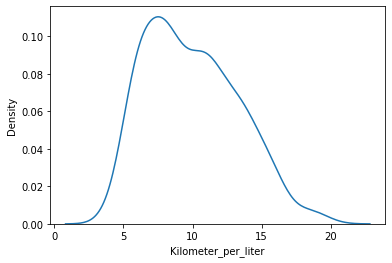

In [150]:
sns.kdeplot(DV)

### NON GRAPHICAL TESTS:

#### Statistical test made to check the significance of DV and to check its normality

#### PearsonR test:

In [151]:
from scipy.stats import pearsonr

In [152]:
for i in IDV_NUM:
    r,p=pearsonr(DV,IDV_NUM[i])
    print(i,r,p)
    if p>0.05:
        print("There is No Significant relation between our correlation value and zero.")
    else:
        print("There is Significant relation.")
        print()

displacement -0.8051269467334895 1.6606417936102427e-90
There is Significant relation.

horsepower -0.7784267839110668 7.031988957281258e-81
There is Significant relation.

weight -0.8322442148558428 6.01529589711527e-102
There is Significant relation.

acceleration 0.4233285368825963 1.778576132110161e-18
There is Significant relation.



In [153]:
DV_IDVNUM.corr()

,displacement,horsepower,weight,acceleration,Kilometer_per_liter
displacement,1.000000,0.897257,0.932994,-0.543800,-0.805127
horsepower,0.897257,1.000000,0.864538,-0.689196,-0.778427
weight,0.932994,0.864538,1.000000,-0.416839,-0.832244
acceleration,-0.543800,-0.689196,-0.416839,1.000000,0.423329
Kilometer_per_liter,-0.805127,-0.778427,-0.832244,0.423329,1.000000


<AxesSubplot:>

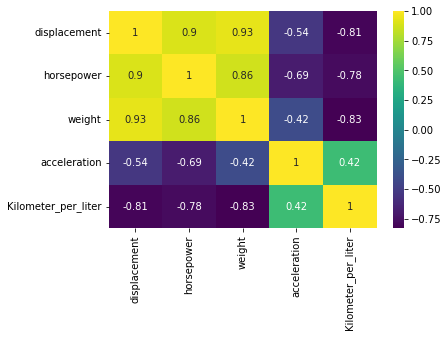

In [154]:
sns.heatmap(DV_IDVNUM.corr(),annot=True,cmap='viridis')

#### SHPIRO WILK test used to pass NORMALITY
Shapiro test used since our dataset has <5000 

objective:
    To check whether our DV is normally distributed or not.
    

In [155]:
from scipy.stats import anderson,shapiro,kstest
from scipy import stats
shapiro_test = stats.shapiro(DV)
shapiro_test

ShapiroResult(statistic=0.967170000076294, pvalue=1.0495841706870124e-07)

In [156]:
s,p=shapiro(DV)
if p>0.05:
    print("normally distributed")
else:
    print("Not normally distributed")

Not normally distributed


####  univariate analysis for Independent variables

### for Numerical

#### KDE plot for IDV_NUM

#### PearsonR test

objective:
    used to check whether IDVs are significant or not

In [157]:
for i in IDV_NUM:
    for j in IDV_NUM:
        r,p = pearsonr(IDV_NUM[i],IDV_NUM[j])
        print(f'{i} and {j} ********(=) {r},{p}')
        if p>0.05:
            print("No Significant relation.")
        else:
            print("There is Significant relation between the IDVs considered.")
        print()

displacement and displacement ********(=) 0.9999999999999997,0.0
There is Significant relation between the IDVs considered.

displacement and horsepower ********(=) 0.8972570018434691,1.5108887258741506e-140
There is Significant relation between the IDVs considered.

displacement and weight ********(=) 0.9329944040890107,3.489083946205901e-175
There is Significant relation between the IDVs considered.

displacement and acceleration ********(=) -0.5438004967345675,1.508540144080377e-31
There is Significant relation between the IDVs considered.

horsepower and displacement ********(=) 0.8972570018434691,1.5108887258741506e-140
There is Significant relation between the IDVs considered.

horsepower and horsepower ********(=) 1.0,0.0
There is Significant relation between the IDVs considered.

horsepower and weight ********(=) 0.8645377375741445,1.364346877373023e-118
There is Significant relation between the IDVs considered.

horsepower and acceleration ********(=) -0.6891955103342366,1.581

In [158]:
IDV_NUM.corr()

,displacement,horsepower,weight,acceleration
displacement,1.000000,0.897257,0.932994,-0.543800
horsepower,0.897257,1.000000,0.864538,-0.689196
weight,0.932994,0.864538,1.000000,-0.416839
acceleration,-0.543800,-0.689196,-0.416839,1.000000


<AxesSubplot:>

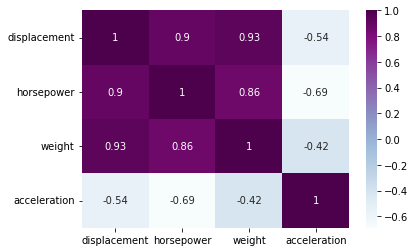

In [159]:
sns.heatmap(IDV_NUM.corr(),annot=True,cmap="BuPu")

#### Normality test for Numerical_IDV using shapiro test

used here to check and verify whether our IDVs are not normally distributed

In [160]:
from scipy.stats import anderson,shapiro,kstest
from scipy import stats
shapiro_test = stats.shapiro(IDV_NUM)
shapiro_test

ShapiroResult(statistic=0.6459673643112183, pvalue=0.0)

In [161]:
s,p=shapiro(IDV_NUM)
if p>0.05:
    print("normally distributed")
else:
    print("Not normally distributed")

Not normally distributed


## Count plot

In [162]:
IDV_CAT.value_counts()

origin  cylinders
1       8            103
        6             73
        4             69
3       4             69
2       4             61
3       6              6
2       6              4
3       3              4
2       5              3
dtype: int64

<AxesSubplot:xlabel='origin', ylabel='count'>

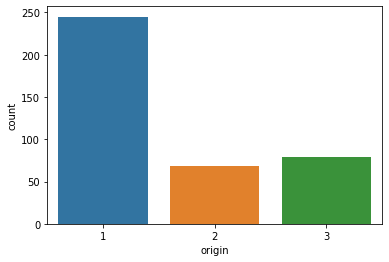

In [163]:
sns.countplot(data=IDV_CAT,x=IDV_CAT.origin)  #used to check the count

<AxesSubplot:xlabel='cylinders', ylabel='count'>

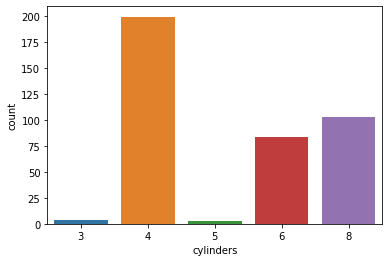

In [164]:
sns.countplot(data=IDV_CAT,x=IDV_CAT.cylinders)  #used to check the count

#### Bivariate Analysis

objective: #finding the relationship between the dependent and the independent numerical variables


Kilometer_per_liter vs displacement


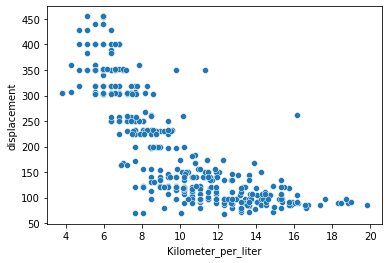

Kilometer_per_liter vs horsepower


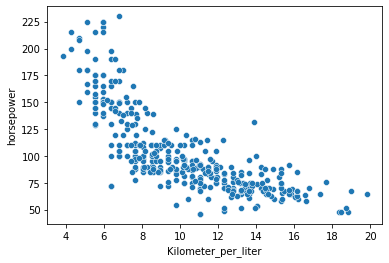

Kilometer_per_liter vs weight


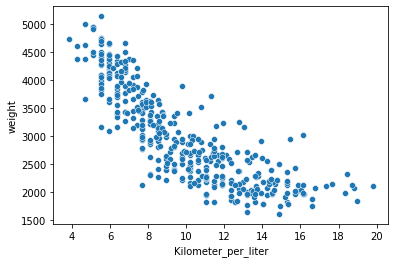

Kilometer_per_liter vs acceleration


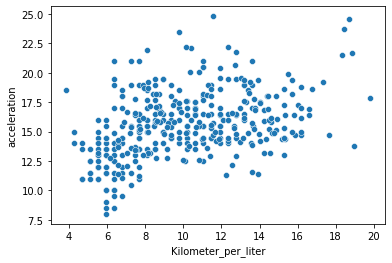

In [165]:
for feature in IDV_NUM.columns:
        print("Kilometer_per_liter vs",feature)
        sns.scatterplot(data=df2,x=df2.Kilometer_per_liter,y=df2[feature])
        plt.show()

## Multivariate analysis

#### checking Multicollinearity for IDV

Objective: To find whether there is multicollinearity presnt between our Numerical IDVs

In [166]:
IDV_NUM.head()

,displacement,horsepower,weight,acceleration
0,307.0,130.0,3504,12.0
1,350.0,165.0,3693,11.5
2,318.0,150.0,3436,11.0
3,304.0,150.0,3433,12.0
4,302.0,140.0,3449,10.5


In [167]:
IDV_NUM.corr()

,displacement,horsepower,weight,acceleration
displacement,1.000000,0.897257,0.932994,-0.543800
horsepower,0.897257,1.000000,0.864538,-0.689196
weight,0.932994,0.864538,1.000000,-0.416839
acceleration,-0.543800,-0.689196,-0.416839,1.000000


<AxesSubplot:>

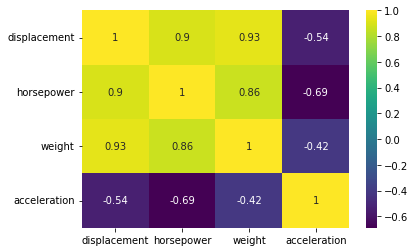

In [168]:
sns.heatmap(IDV_NUM.corr(),annot=True,cmap="viridis")

In [169]:
for i in IDV_NUM:
    for j in IDV_NUM:
        r,p = pearsonr(IDV_NUM[i],IDV_NUM[j])
        print(f'{i} and {j} ********(=) {r},{p}')
        print()

displacement and displacement ********(=) 0.9999999999999997,0.0

displacement and horsepower ********(=) 0.8972570018434691,1.5108887258741506e-140

displacement and weight ********(=) 0.9329944040890107,3.489083946205901e-175

displacement and acceleration ********(=) -0.5438004967345675,1.508540144080377e-31

horsepower and displacement ********(=) 0.8972570018434691,1.5108887258741506e-140

horsepower and horsepower ********(=) 1.0,0.0

horsepower and weight ********(=) 0.8645377375741445,1.364346877373023e-118

horsepower and acceleration ********(=) -0.6891955103342366,1.5818862297815785e-56

weight and displacement ********(=) 0.9329944040890107,3.489083946205901e-175

weight and horsepower ********(=) 0.8645377375741445,1.364346877373023e-118

weight and weight ********(=) 1.0,0.0

weight and acceleration ********(=) -0.4168392020037067,6.565615702021497e-18

acceleration and displacement ********(=) -0.5438004967345675,1.508540144080377e-31

acceleration and horsepower *******

#### VIF factor check:

Objective: To find out the possiblity that certain IDV has no correlation

In [170]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [171]:
IDV_NUM.head()

,displacement,horsepower,weight,acceleration
0,307.0,130.0,3504,12.0
1,350.0,165.0,3693,11.5
2,318.0,150.0,3436,11.0
3,304.0,150.0,3433,12.0
4,302.0,140.0,3449,10.5


In [172]:
for i in range(len(IDV_NUM.columns)):
    print(f'{IDV_NUM.columns[i]}********(=){variance_inflation_factor(IDV_NUM.values,i)}')

displacement********(=)45.8655942608709
horsepower********(=)42.01519337024783
weight********(=)136.44952062802815
acceleration********(=)20.304705092289847


## Linear Regression model considering Train and Test split

In [173]:
from sklearn.model_selection import train_test_split

In [174]:
x=IDV_NUM
x

,displacement,horsepower,weight,acceleration
0,307.0,130.0,3504,12.0
1,350.0,165.0,3693,11.5
2,318.0,150.0,3436,11.0
3,304.0,150.0,3433,12.0
4,302.0,140.0,3449,10.5
...,...,...,...,...
393,140.0,86.0,2790,15.6
394,97.0,52.0,2130,24.6
395,135.0,84.0,2295,11.6
396,120.0,79.0,2625,18.6


In [175]:
y=DV
y

0       7.652587
1       6.377156
2       7.652587
3       6.802299
4       7.227443
         ...    
393    11.478880
394    18.706323
395    13.604599
396    11.904024
397    13.179455
Name: Kilometer_per_liter, Length: 392, dtype: float64

In [176]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30,random_state=42)  # test size=30% and train size =70%

In [177]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(274, 4)
(118, 4)
(274,)
(118,)


In [178]:
from sklearn.linear_model import LinearRegression

In [179]:
l=LinearRegression()  #A new variable L is used to store the Linear Regression

In [180]:
l.fit(x_train,y_train) #fit x and y train and assign in l

LinearRegression()

In [181]:
l.coef_  #slope value

array([-0.00423318, -0.02367831, -0.00201897, -0.02220252])

In [182]:
l.intercept_   #intercept value

19.739937955520098

#### RMSE for Train

objective :
 To optimize the mean squared error to get better prediction

In [183]:
train_pred=l.predict(x_train)
train_pred

array([11.88752631, 11.3023344 , 11.81057848, 11.08722147,  9.20109105,
       13.37646174, 11.23154457, 11.12982321, 13.54734936, 12.74781534,
        9.58145286, 13.0008884 , 11.43908753, 11.93177624, 10.44121243,
       12.87048981,  6.90433464, 12.51335447, 11.90917953, 13.33642334,
        9.40750254,  6.70839215,  6.37162334,  8.6978022 , 10.48978542,
       11.72162016, 12.13627037, 11.04815639, 11.65647233,  3.61843502,
        9.03056319, 10.6205119 ,  6.67770782, 13.32744634,  3.9097983 ,
       11.55368929, 13.42274041, 11.12686587, 13.15471621,  4.88449746,
       13.1784985 , 13.53104957,  2.98233828, 13.74009707, 11.57691048,
        8.45077077,  5.96573508,  4.3423776 ,  6.35450135,  9.63370838,
       13.47836592, 10.4707686 ,  9.29598868,  8.60613929,  5.17353866,
       11.76416741,  5.58713597, 12.97083447, 10.22383004,  5.1990577 ,
       11.80367013, 11.7263455 ,  9.41510588, 11.19654134, 10.62962002,
       10.17774192, 12.62757789,  5.5709005 ,  6.48469169, 10.15

In [184]:
error=y_train-train_pred

In [185]:
error

110   -2.534365
17    -2.374317
320    3.919739
24    -2.159204
128   -2.823935
         ...   
72    -0.388793
107   -2.773482
272   -0.814733
352    0.190537
103    0.581281
Name: Kilometer_per_liter, Length: 274, dtype: float64

<AxesSubplot:xlabel='Kilometer_per_liter', ylabel='Density'>

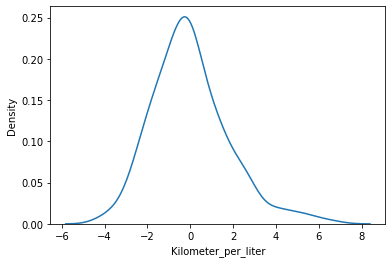

In [186]:
sns.kdeplot(error)

In [187]:
from sklearn.metrics import mean_squared_error,r2_score

In [188]:
mean_squared_error(train_pred,y_train)

3.2133145524225517

In [189]:
np.sqrt(mean_squared_error(train_pred,y_train))     #Train RMSE

1.7925720494369402

In [190]:
r2_score(y_train,train_pred)   # R sq of Train RMSE

0.7223269016944681

## TEST RMSE

In [191]:
test_pred=l.predict(x_test)
test_pred

array([12.88058251, 10.51312165, 13.93575584, 13.29500233, 11.13167743,
       12.83844838,  4.1728995 , 12.57639736,  9.59288036, 14.0894818 ,
        5.6283692 , 10.26258834,  5.45466764, 12.81502589,  8.66523278,
       11.48754889, 10.02314781, 12.38930361, 11.60977544, 11.75712005,
       10.58845273, 13.25146318, 13.38170124,  8.02127624, 13.51169628,
       12.27693625, 10.72448796,  9.01387906, 13.83687638, 11.95889707,
        5.54991561,  9.76402092,  8.03847173, 11.75347408,  5.21581479,
       13.38074937,  5.42733916, 12.76316878,  6.12186417,  3.49678236,
        6.77760418, 12.98295441, 13.20600342, 12.51684785,  5.04763267,
        2.98245927,  9.35452035, 13.09413583, 12.1619626 , 13.47545279,
        5.94478203, 12.06880038, 12.10116162, 12.46535706, 10.05571731,
        8.31062539,  9.22339986, 10.15149534, 11.86665408, 12.20305256,
        2.24608131, 10.00751092, 10.54696526, 10.80073323, 11.51694991,
       12.47361387, 11.23008907, 13.47989329,  8.89672979,  4.24

In [192]:
mean_squared_error(test_pred,y_test)

3.380585743403851

In [193]:
np.sqrt(mean_squared_error(test_pred,y_test))   #Test RMSE

1.8386369253889825

In [194]:
r2_score(y_test,test_pred)    #test r sq

0.6464709361799634

#### Adding constants to perform matrix multiplication

In [195]:
import statsmodels.api as sm

In [196]:
x_train1=sm.add_constant(x_train)
x_train1

,const,displacement,horsepower,weight,acceleration
110,1.0,108.0,94.0,2379,16.5
17,1.0,200.0,85.0,2587,16.0
320,1.0,119.0,92.0,2434,15.0
24,1.0,199.0,90.0,2648,15.0
128,1.0,250.0,100.0,3336,17.0
...,...,...,...,...,...
72,1.0,304.0,150.0,3892,12.5
107,1.0,232.0,100.0,2789,15.0
272,1.0,151.0,85.0,2855,17.6
352,1.0,98.0,65.0,2380,20.7


In [197]:
model=sm.OLS(y_train,x_train1).fit()


In [198]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Kilometer_per_liter   R-squared:                       0.722
Model:                             OLS   Adj. R-squared:                  0.718
Method:                  Least Squares   F-statistic:                     174.9
Date:                 Thu, 10 Feb 2022   Prob (F-statistic):           1.40e-73
Time:                         15:59:16   Log-Likelihood:                -548.71
No. Observations:                  274   AIC:                             1107.
Df Residuals:                      269   BIC:                             1125.
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           19.7399      1.234     15.994      0.000      17.310      22.170
displacement    -0.0042      0.003     -1.259      0.209      -0.011       0.002
horsepower      -0.0237      0.008     -2.864      0.005      -0.040      -0.007
weight          -0.0020      0.000     -4.964      0.000      -0.003      -0.001
acceleration    -0.0222      0.062     -0.358      0.721      -0.144       0.100
==============================================================================
Omnibus:                       29.945   Durbin-Watson:                   2.183
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.189
Skew:                           0.757   Prob(JB):                     3.09e-09
Kurtosis:                       4.068   Cond. No.                     3.52e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.52e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### dropping displacement 

In [199]:
x_train2=x_train1.drop(labels='displacement',axis=1)
sm.OLS(y_train,sm.add_constant(x_train2)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Kilometer_per_liter   R-squared:                       0.721
Model:                             OLS   Adj. R-squared:                  0.718
Method:                  Least Squares   F-statistic:                     232.2
Date:                 Thu, 10 Feb 2022   Prob (F-statistic):           1.86e-74
Time:                         15:59:16   Log-Likelihood:                -549.51
No. Observations:                  274   AIC:                             1107.
Df Residuals:                      270   BIC:                             1121.
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           20.0423      1.212     16.538      0.000      17.656      22.428
horsepower      -0.0263      0.008     -3.294      0.001      -0.042      -0.011
weight          -0.0024      0.000     -8.308      0.000      -0.003      -0.002
acceleration    -0.0074      0.061     -0.121      0.904      -0.128       0.113
==============================================================================
Omnibus:                       25.889   Durbin-Watson:                   2.195
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.342
Skew:                           0.696   Prob(JB):                     9.48e-08
Kurtosis:                       3.946   Cond. No.                     3.44e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.44e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Dropping acceleration

In [200]:
x_train2=x_train1.drop(labels='acceleration',axis=1)
sm.OLS(y_train,sm.add_constant(x_train2)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Kilometer_per_liter   R-squared:                       0.722
Model:                             OLS   Adj. R-squared:                  0.719
Method:                  Least Squares   F-statistic:                     234.0
Date:                 Thu, 10 Feb 2022   Prob (F-statistic):           8.99e-75
Time:                         15:59:16   Log-Likelihood:                -548.77
No. Observations:                  274   AIC:                             1106.
Df Residuals:                      270   BIC:                             1120.
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           19.3562      0.609     31.794      0.000      18.158      20.555
displacement    -0.0040      0.003     -1.215      0.225      -0.010       0.002
horsepower      -0.0218      0.006     -3.428      0.001      -0.034      -0.009
weight          -0.0021      0.000     -5.818      0.000      -0.003      -0.001
==============================================================================
Omnibus:                       28.973   Durbin-Watson:                   2.180
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.575
Skew:                           0.741   Prob(JB):                     6.93e-09
Kurtosis:                       4.045   Cond. No.                     1.74e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.74e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### dropping both displacement and acceleration from x_train1

In [201]:
x_train3=x_train2.drop(labels='displacement',axis=1)
sm.OLS(y_train,sm.add_constant(x_train3)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Kilometer_per_liter   R-squared:                       0.721
Model:                             OLS   Adj. R-squared:                  0.719
Method:                  Least Squares   F-statistic:                     349.6
Date:                 Thu, 10 Feb 2022   Prob (F-statistic):           8.86e-76
Time:                         15:59:16   Log-Likelihood:                -549.52
No. Observations:                  274   AIC:                             1105.
Df Residuals:                      271   BIC:                             1116.
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.9044      0.409     48.659      0.000      19.099      20.710
horsepower    -0.0256      0.006     -4.651      0.000      -0.037      -0.015
weight        -0.0024      0.000     -9.572      0.000      -0.003      -0.002
==============================================================================
Omnibus:                       25.662   Durbin-Watson:                   2.194
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.999
Skew:                           0.692   Prob(JB):                     1.13e-07
Kurtosis:                       3.942   Cond. No.                     1.16e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### eventhough the displacement and acceleration is dropped the Rsq value is not increased so make the highest VIF factor weight(IDV) to new DV and build the model again

## HOMOSCADACITY

In [202]:
import statsmodels.api as sm


In [203]:
model=sm.OLS(y_train,x_train1).fit()


In [204]:
m=model.resid
m

110   -2.534365
17    -2.374317
320    3.919739
24    -2.159204
128   -2.823935
         ...   
72    -0.388793
107   -2.773482
272   -0.814733
352    0.190537
103    0.581281
Length: 274, dtype: float64

<AxesSubplot:>

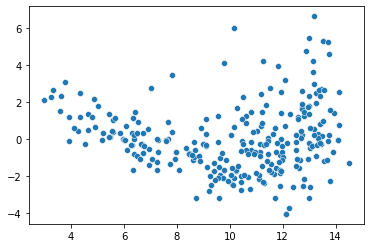

In [205]:
sns.scatterplot(x=train_pred,y=m)

## LASSO

In [206]:
from sklearn.linear_model import Lasso

In [207]:
La=Lasso(alpha=0.1)

In [208]:
La.fit(x_train,y_train)

Lasso(alpha=0.1)

In [209]:
La.intercept_

19.358157947193167

In [210]:
La.coef_

array([-0.00400763, -0.0215424 , -0.0020964 , -0.        ])

In [211]:
train_pred1=La.predict(x_train)
train_pred1

array([11.91301181, 11.30213978, 11.79671062, 11.07055501,  9.20841832,
       13.39867167, 11.20304992, 11.11313746, 13.63112987, 12.69799383,
        9.61035111, 12.93665875, 11.47907524, 11.91116464, 10.44800969,
       12.8335054 ,  6.87814872, 12.52547859, 11.90939741, 13.38252467,
        9.38118296,  6.68736431,  6.33093513,  8.69226755, 10.51640196,
       11.8101415 , 12.19543814, 11.08053466, 11.68291267,  3.67163746,
        9.04287159, 10.60109448,  6.69155205, 13.33770468,  3.87258405,
       11.53405018, 13.43204268, 11.10423304, 13.19384866,  4.89562108,
       13.19701025, 13.59244129,  2.99211384, 13.76400332, 11.56968898,
        8.43449613,  5.96992261,  4.39176653,  6.39664359,  9.65162323,
       13.51234834, 10.57605454,  9.33000953,  8.60725669,  5.16714266,
       11.75558498,  5.5772415 , 12.92694048, 10.22019888,  5.17842026,
       11.78752926, 11.71415525,  9.42969519, 11.20002947, 10.62980863,
       10.19248982, 12.56907756,  5.56177111,  6.47139394, 10.15

In [212]:
error_LA=y_train-train_pred1

In [213]:
error_LA

110   -2.559850
17    -2.374122
320    3.933607
24    -2.142537
128   -2.831263
         ...   
72    -0.372132
107   -2.774700
272   -0.818258
352    0.136075
103    0.628548
Name: Kilometer_per_liter, Length: 274, dtype: float64

<AxesSubplot:xlabel='Kilometer_per_liter', ylabel='Density'>

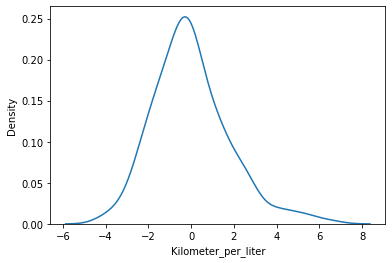

In [214]:
sns.kdeplot(error_LA)

In [215]:
from sklearn.metrics import mean_squared_error,r2_score

In [216]:
mean_squared_error(train_pred1,y_train)

3.2148663864178735

In [217]:
np.sqrt(mean_squared_error(train_pred1,y_train))

1.7930048484089143

In [218]:
r2_score(y_train,train_pred1)

0.722192802605659

### LASSO TEST

In [219]:
test_pred1=La.predict(x_test)
test_pred1

array([12.89797946, 10.5364197 , 13.9273989 , 13.38703287, 11.09548624,
       12.83599503,  4.14338088, 12.60539102,  9.567262  , 14.11608209,
        5.63098376, 10.26393526,  5.47610908, 12.80245263,  8.69104974,
       11.55244924, 10.01508497, 12.38311302, 11.55245372, 11.73249491,
       10.57901661, 13.38388024, 13.36722567,  7.98151591, 13.48298049,
       12.27824738, 10.7578769 ,  8.98496798, 13.89048667, 11.97195094,
        5.52382107,  9.76012617,  8.03779689, 11.75908976,  5.16541372,
       13.36780407,  5.40881231, 12.78707482,  6.12997396,  3.60890669,
        6.73625422, 12.96257928, 13.19234638, 12.46738981,  5.0002674 ,
        3.03672788,  9.32162393, 13.04170525, 12.2125795 , 13.42877571,
        5.94704468, 12.08316766, 12.11202312, 12.45328623, 10.07234343,
        8.3403988 ,  9.18598872, 10.16523661, 11.91588555, 12.18798766,
        2.30836693, 10.02217619, 10.5271807 , 10.78245531, 11.50216049,
       12.49432956, 11.19914945, 13.42877571,  8.89212237,  4.27

In [221]:
mean_squared_error(test_pred1,y_test)

3.37078502067029

In [222]:
np.sqrt(mean_squared_error(test_pred1,y_test))

1.8359697766222325

## RIDGE

In [223]:
from sklearn.linear_model import Ridge

In [224]:
Ri=Ridge(alpha=0.1)

In [225]:
Ri.fit(x_train,y_train)

Ridge(alpha=0.1)

In [226]:
Ri.intercept_

19.73988798775421

In [227]:
Ri.coef_

array([-0.00423316, -0.02367804, -0.00201898, -0.02219966])

In [228]:
train_pred2=Ri.predict(x_train)
train_pred2

array([11.88752966, 11.30233411, 11.81057675, 11.0872191 ,  9.20109198,
       13.37646453, 11.23154118, 11.1298212 , 13.54736023, 12.74780897,
        9.58145677, 13.00088022, 11.43909296, 11.93177377, 10.44121362,
       12.87048506,  6.9043312 , 12.51335607, 11.90917963, 13.33642929,
        9.40749922,  6.7083892 ,  6.37161792,  8.69780187, 10.48978952,
       11.72163146, 12.13627795, 11.04816068, 11.65647585,  3.61844099,
        9.0305649 , 10.62050949,  6.6777087 , 13.32744764,  3.90979364,
       11.55368685, 13.42274155, 11.12686317, 13.15472135,  4.88449882,
       13.17850086, 13.53105759,  2.9823394 , 13.74010024, 11.57690963,
        8.4507681 ,  5.96573575,  4.34238358,  6.35450611,  9.63371063,
       13.47837033, 10.47078278,  9.295993  ,  8.60613954,  5.17353791,
       11.7641661 ,  5.58713455, 12.97082886, 10.22382959,  5.19905518,
       11.8036681 , 11.726344  ,  9.41510797, 11.19654187, 10.62962035,
       10.17774356, 12.62757035,  5.57089912,  6.48468973, 10.15

In [229]:
error_RI=y_train-train_pred2

In [230]:
error_RI

110   -2.534368
17    -2.374316
320    3.919740
24    -2.159201
128   -2.823936
         ...   
72    -0.388791
107   -2.773482
272   -0.814733
352    0.190530
103    0.581287
Name: Kilometer_per_liter, Length: 274, dtype: float64

<AxesSubplot:xlabel='Kilometer_per_liter', ylabel='Density'>

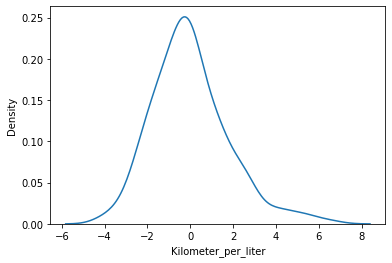

In [231]:
sns.kdeplot(error_RI)

In [232]:
from sklearn.metrics import mean_squared_error,r2_score

In [233]:
mean_squared_error(train_pred2,y_train)

3.2133145524480535

In [234]:
np.sqrt(mean_squared_error(train_pred2,y_train))

1.7925720494440534

In [249]:
r2_score(y_train,train_pred2)

0.7223269016922644

## RIDGE TEST

In [235]:
test_pred2=Ri.predict(x_test)
test_pred2

array([12.88058483, 10.51312489, 13.9357546 , 13.29501408, 11.13167303,
       12.83844809,  4.17289569, 12.57640121,  9.59287717, 14.0894853 ,
        5.62836875, 10.26258869,  5.45467042, 12.81502432,  8.66523653,
       11.4875575 , 10.0231469 , 12.38930294, 11.60976835, 11.757117  ,
       10.58845143, 13.25148032, 13.38169933,  8.0212708 , 13.5116926 ,
       12.27693647, 10.72449278,  9.01387555, 13.83688325, 11.95889892,
        5.54991238,  9.76402046,  8.03847165, 11.7534751 ,  5.21580814,
       13.38074767,  5.42733737, 12.76317183,  6.12186552,  3.4967967 ,
        6.77759903, 12.98295182, 13.2060015 , 12.51684162,  5.04762687,
        2.98246579,  9.35451607, 13.09412915, 12.1619691 , 13.47544669,
        5.94478217, 12.06880218, 12.10116282, 12.46535535, 10.05571908,
        8.31062937,  9.22339484, 10.15149686, 11.86666049, 12.20305053,
        2.24608891, 10.00751274, 10.54696257, 10.80073138, 11.51694803,
       12.47361648, 11.23008528, 13.47988663,  8.89672912,  4.24

In [237]:
mean_squared_error(test_pred2,y_test)

3.380584540911875

In [238]:
np.sqrt(mean_squared_error(test_pred2,y_test))

1.8386365983825828

## Cross validation

#### for our basic linear model

In [239]:
from sklearn.model_selection import cross_val_score

In [240]:
cross=cross_val_score(l,x_train,y_train,cv=5)

In [241]:
cross

array([0.67619177, 0.66412121, 0.67807993, 0.83360759, 0.68661996])

C:\Users\ARAVINDKUMAR R\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

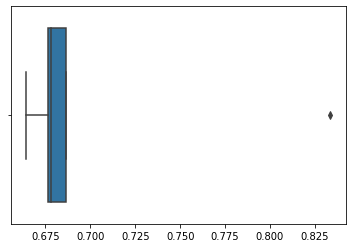

In [242]:
sns.boxplot(cross)

#### For Lasso

In [243]:
cross_LA=cross_val_score(La,x_train,y_train,cv=5)

In [244]:
cross_LA

array([0.67657486, 0.66767792, 0.6805394 , 0.83423084, 0.69068566])

C:\Users\ARAVINDKUMAR R\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

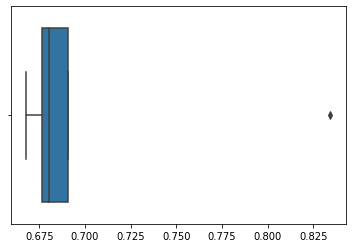

In [245]:
sns.boxplot(cross_LA)

#### For Ridge

In [246]:
cross_Ri=cross_val_score(Ri,x_train,y_train,cv=5)

In [247]:
cross_Ri

array([0.67619181, 0.6641222 , 0.67808076, 0.83360772, 0.68662062])

C:\Users\ARAVINDKUMAR R\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

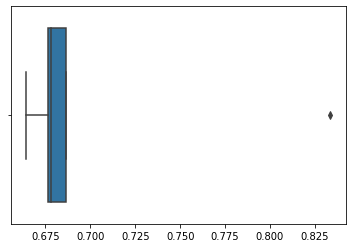

In [248]:
sns.boxplot(cross_Ri)